In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

import mglearn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm

fe = fm.FontEntry(fname = 'nanum', name = 'nanum')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter('ignore')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# import os
# os.chdir('/content/drive/MyDrive/Colab Notebooks/ML_6')

In [ ]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

In [ ]:
train_x = train.drop(columns=['ID', 'TARGET', '휴대전화 소유 여부'])
train_y = train['TARGET']

test_x = test.drop(columns=['ID', '휴대전화 소유 여부'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['성별', '수입 유형', '최종 학력', '결혼 여부', '주거 형태', '직업', '산업군'] # , '업무용 휴대전화 소유 여부', '차량 소유 여부', '부동산 소유 여부', '이메일 소유 여부'

for i in categorical_features:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])

    for case in np.unique(test_x[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)
    test_x[i]=le.transform(test_x[i])

display(train_x.head(3))
display(test_x.head(3))

,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,주거 형태,거주지 인구 비율,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,2,1,1,2,18054000.0,5,0,0,3,0.004960,0,0,1,4.0,6,39,1000,23.0
1,1,1,0,0,59472000.0,1,1,0,3,0.018029,1,0,4,2.0,24,45,4,16.0
2,2,0,1,0,29736000.0,1,0,0,3,0.010500,1,0,5,2.0,23,32,3,9.0


,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,주거 형태,거주지 인구 비율,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,1,0,0,2,37170000.0,1,2,0,3,0.006296,1,0,17,4.0,5,27,2,8.0
1,1,0,0,0,47790000.0,1,1,0,3,0.004960,1,0,3,2.0,49,40,8,11.0
2,1,1,1,1,37170000.0,0,0,0,3,0.026392,1,0,3,3.0,3,43,15,14.0


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, test_size = 0.2,random_state=1)a

<Axes: >

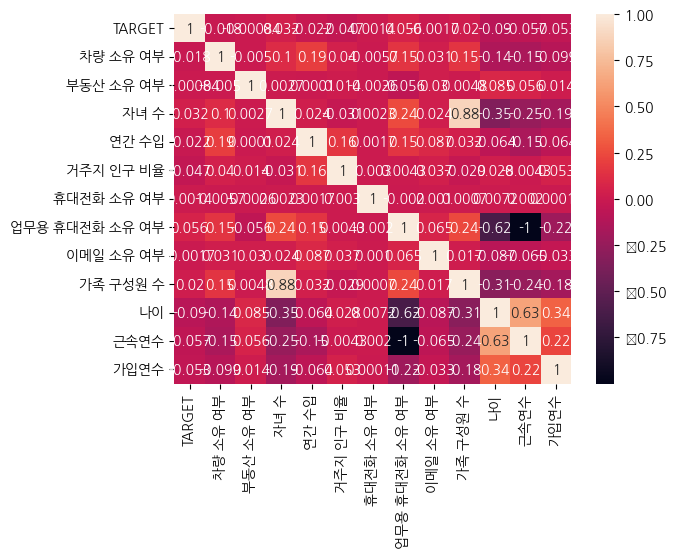

In [ ]:
sns.heatmap(train.corr(), annot=True)

In [ ]:
categorical_features = ['성별', '수입 유형', '최종 학력', '결혼 여부', '주거 형태', '직업', '산업군'] # , '업무용 휴대전화 소유 여부', '차량 소유 여부', '부동산 소유 여부', '이메일 소유 여부'
train_vif = train.drop(columns=['ID'])
for i in categorical_features:
    le = LabelEncoder()
    le = le.fit(train_vif[i])
    train_vif[i] = le.transform(train_vif[i])
train_vif = train_vif.astype('float64')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_vif.values, i) for i in range(train_vif.shape[1])]
vif["features"] = train_vif.columns
vif

,VIF Factor,features
0,1.143481,TARGET
1,16.161951,성별
2,1.801914,차량 소유 여부
3,3.575650,부동산 소유 여부
4,6.657308,자녀 수
5,4.080350,연간 수입
6,23.491484,수입 유형
7,1.394105,최종 학력
8,1.628184,결혼 여부
9,21.531114,주거 형태


In [ ]:
vif[vif['VIF Factor']>10].reset_index(drop=True)

,VIF Factor,features
0,16.161951,성별
1,23.491484,수입 유형
2,21.531114,주거 형태
3,10420.352782,휴대전화 소유 여부
4,8456.212315,업무용 휴대전화 소유 여부
5,34.810342,가족 구성원 수
6,29.510549,나이
7,1982.770312,근속연수


In [ ]:
drop_cols = ['성별', '수입 유형', '주거 형태', '업무용 휴대전화 소유 여부', '가족 구성원 수', '나이', '근속연수']

In [ ]:
drop_cols = ['업무용 휴대전화 소유 여부', '가족 구성원 수']

In [ ]:
scaler = MinMaxScaler()
X_standard = scaler.fit_transform(train_x)

x_train, x_val, y_train, y_val = train_test_split(X_standard, train_y, test_size = 0.2,random_state=42)

In [ ]:
model = LogisticRegression()
reg = model.fit(x_train, y_train)
train_r2 = model.score(x_train, y_train)
test_r2 = model.score(x_val, y_val)
print('train r2 score:', train_r2)
print('test r2 score:', test_r2)

train r2 score: 0.8923333333333333
test r2 score: 0.895


In [ ]:
y = train_y.values
X = train_x.drop(drop_cols, axis=1)

scaler = MinMaxScaler()
X_standard = scaler.fit_transform(X)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X_standard, y, test_size = 0.2,random_state=42)

In [ ]:
model = LogisticRegression()
reg = model.fit(x_train, y_train)
train_r2_again = model.score(x_train, y_train)
test_r2_again = model.score(x_val, y_val)
print('train r2 score:', train_r2_again)
print('test r2 score:', test_r2_again)

train r2 score: 0.8923333333333333
test r2 score: 0.895


In [ ]:
result = pd.DataFrame({'Train R2': [train_r2, train_r2_again], 'Test R2': [test_r2, test_r2_again]}, index=['Baseline', 'W/O multicollinearity'])
result

,Train R2,Test R2
Baseline,0.892333,0.895
W/O multicollinearity,0.892333,0.895


*https://www.kaggle.com/datasets/samori/housing-prices-competition-for-kaggle-learn-users*

In [ ]:
data = pd.read_csv('train_multi.csv')

In [ ]:
object_cols = ['MSZoning','Street','Alley', 'LotShape', 'LandContour', 'Utilities',
               'LotConfig','LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
               'BldgType', 'HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st',
               'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation',
               'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
               'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
               'Functional', 'FireplaceQu', 'GarageType','GarageFinish', 'GarageQual',
               'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',  'SaleType',
               'SaleCondition']

data_others = data.drop(object_cols, axis=1)
data_others.fillna(-999, inplace=True)

data = data[object_cols]
data.fillna('Unknown', inplace=True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_encoded = ordinal_encoder.fit_transform(data)
data_encoded = pd.DataFrame(data_encoded, index=data.index, columns=data.columns)

In [ ]:
temp = pd.concat([data_encoded, data_others], axis=1)

In [ ]:
A = temp.loc[:, 'MSZoning':'Condition2']
B = temp.loc[:, 'BldgType':'BsmtFinType2']
C = temp.loc[:, 'Heating':'Id']
D = temp.loc[:, 'MSSubClass':'LowQualFinSF']
E = temp.loc[:, 'GrLivArea':'GarageArea']
F = temp.loc[:, 'WoodDeckSF':'YrSold']

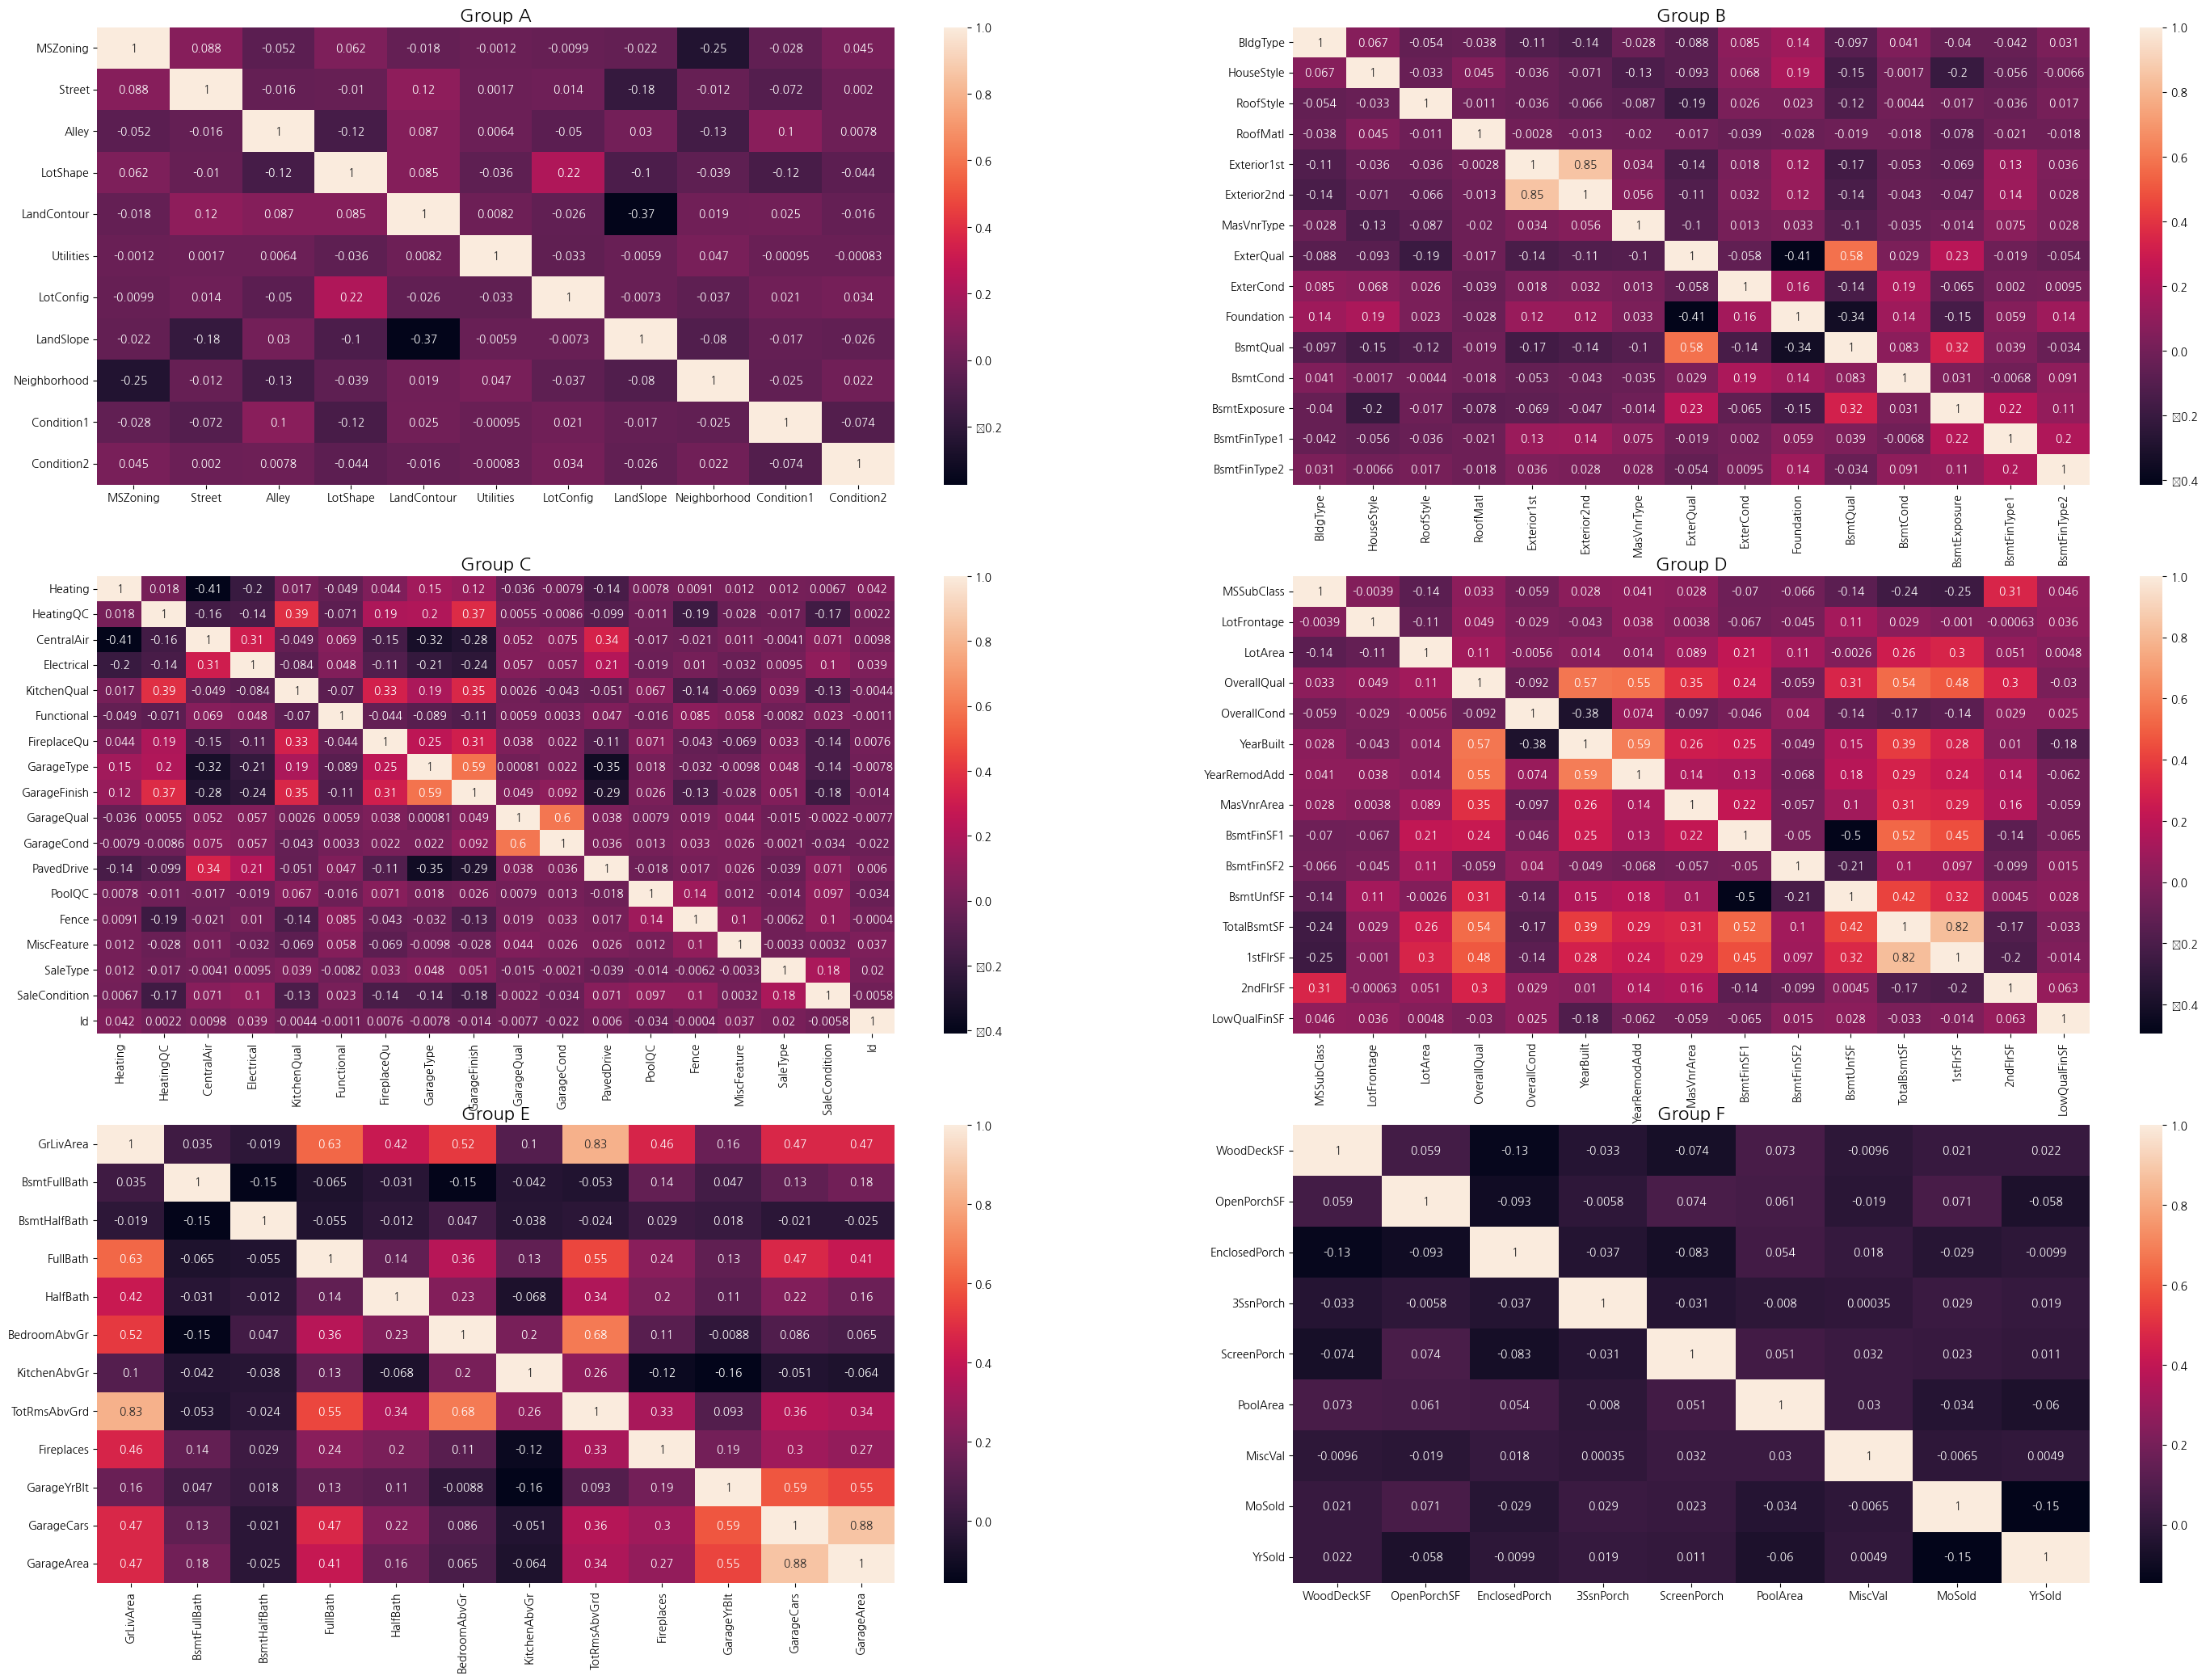

In [ ]:
groups = [A, B, C, D, E, F]
titles = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E', 'Group F']

plt.figure(figsize=(35, 25))

for idx in range(6):
    plt.subplot(3, 2, idx+1)
    sns.heatmap(groups[idx].corr(), annot=True)
    plt.title(titles[idx], fontdict={'fontsize': 16})

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
vif["features"] = temp.columns
vif

,VIF Factor,features
0,31.947919,MSZoning
1,289.025085,Street
2,31.716158,Alley
3,3.953035,LotShape
4,21.841014,LandContour
...,...,...
76,5.225025,PoolArea
77,1.646202,MiscVal
78,6.852052,MoSold
79,41775.120581,YrSold


In [ ]:
vif[vif['VIF Factor']>10].reset_index(drop=True)

In [ ]:
drop_cols = ['MSZoning', 'Street', 'Condition2', 'Exterior2nd', 'ExterQual', 'BsmtQual',
             'Electrical', 'Functional', 'GarageCond', 'PoolQC', 'MiscFeature', 'SaleType',
             'MSSubClass', 'OverallCond', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF',
             '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'YrSold']

In [ ]:
y = temp['SalePrice'].values
X = temp.drop(['SalePrice', 'Id']+drop_cols, axis=1)

scaler = MinMaxScaler()
X_standard = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

In [ ]:
lin = LinearRegression()
reg = lin.fit(x_train, y_train)
train_r2_again = lin.score(x_train, y_train)
test_r2_again = lin.score(x_val, y_val)
print('train r2 score:', train_r2_again)
print('test r2 score:', test_r2_again)

train r2 score: 0.843737968535008
test r2 score: 0.7385496028317098


In [ ]:
y = temp['SalePrice'].values
X = temp.drop('SalePrice', axis=1)

scaler = MinMaxScaler()
X_standard = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

lin = LinearRegression()
reg = lin.fit(X_train, y_train)
train_r2 = lin.score(X_train, y_train)
test_r2 = lin.score(X_test, y_test)
print('train r2 score:', train_r2)
print('test r2 score:', test_r2)

train r2 score: 0.8857058134292344
test r2 score: 0.6701393827111863


In [ ]:
result = pd.DataFrame({'Train R2': [train_r2, train_r2_again], 'Test R2': [test_r2, test_r2_again]}, index=['Baseline', 'W/O multicollinearity'])
result

,Train R2,Test R2
Baseline,0.885706,0.670139
W/O multicollinearity,0.843738,0.738550


In [ ]:
y = temp['SalePrice'].values
X = temp.drop('SalePrice', axis=1)

scaler = MinMaxScaler()
X_standard = scaler.fit_transform(X)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X_standard, y, test_size = 0.2,random_state=42)

model_ridge = make_pipeline(StandardScaler(), Ridge())
model_ridge.fit(x_train, y_train)
print(model_ridge.score(x_train, y_train))
print(model_ridge.score(x_val, y_val))

0.852159200770948
0.847427659977404


In [ ]:
param_value = {'alpha':[0.0001,0.01,1,2,3,4]}
modelRidge = Ridge()
gridSearch = GridSearchCV(modelRidge, param_grid = param_value, cv=10)
gridSearch.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.01, 1, 2, 3, 4]})

In [ ]:
gridSearch.best_score_

0.8058346810929059

In [ ]:
model_lasso = Lasso(alpha=0.5)
model_lasso.fit(x_train,y_train)
print(model_lasso.score(x_train,y_train))
print(model_lasso.score(x_val, y_val))

0.8521592705322327
0.8473667344508126


In [ ]:
param_value = {'alpha':[0.0001,0.01,1,2,3,4]}
modelLasso = Lasso()
gridSearch = GridSearchCV(modelLasso,param_grid = param_value,cv=10) # 교차검증, 파라미터 값 찾기
gridSearch.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.01, 1, 2, 3, 4]})

In [ ]:
gridSearch.best_score_

0.6315156729067344

In [ ]:
model_elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
model_elastic.fit(x_train,y_train)
print(model_elastic.score(x_train,y_train))
print(model_elastic.score(x_val, y_val))

0.8373844173636644
0.8361779668526333


In [ ]:
modelElastic = make_pipeline(StandardScaler(),ElasticNet())
param_value = {'elasticnet__alpha':[0.0001, 0.005, 0.01, 0.5, 1, 2, 3]}
gridSearch = GridSearchCV(modelElastic,param_grid = param_value,cv=10)
gridSearch.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': [0.0001, 0.005, 0.01, 0.5, 1, 2,
                                               3]})

In [ ]:
gridSearch.best_params_

{'elasticnet__alpha': 1}

In [ ]:
gridSearch.best_score_

0.7974204936004258